#### Script di recupero dataframe retweetted

In [2]:
#Caricare le librerie
import tweepy
import pandas as pd
from tqdm import tqdm
import datetime
import re

consumer_key= "R8zEjULDipNcbMMeGNvnZcbp6"
consumer_secret= "6V856b39nGvS5bgKj9Mf15hc6FEiFnhSlaC8A7G81ZIS7bPxha"
access_token= "1054459819145510914-zRzbWMLQui10gwAL0Rh4IRAbPsZXLT"
access_token_secret= "kZj5myoG661SRnobImDChIIer1b6jHdaDmjqvygKds03T"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [11]:
nodes_df6=pd.read_csv('Nodes_df6.csv')

In [3]:
edges_df6=pd.read_csv('Edges_df6.csv')

In [4]:
edges_df6.head()

,Source,Target,Type,Kind,Id,Label,Interval,Weight
0,442083142,1364298062919794688,Directed,NaN,1,NaN,NaN,1.0
1,305255857,977383349235961857,Directed,NaN,2,NaN,NaN,1.0
2,950098070771036160,1438546161955229703,Directed,NaN,3,NaN,NaN,1.0
3,229160327,1364298062919794688,Directed,NaN,4,NaN,NaN,1.0
4,229160327,1364298062919794688,Directed,NaN,5,NaN,NaN,1.0


In [5]:
ids_list=list(set(list(edges_df6.Source)))

In [11]:
old_tweets=pd.read_csv('retweetted2_nogreenpass_vaccinatevi_casapound.csv')

In [14]:
min(list(old_tweets.date))

'2021-03-29 11:00:52+00:00'

In [6]:
import pytz

startDate = datetime.datetime(2021, 1, 1, 0, 0, 0)
endDate =   datetime.datetime(2021, 12, 31, 0, 0, 0)

utc=pytz.UTC

#startDate=utc.localize(startDate) 
#endDate=utc.localize(startDate) 

startDate = startDate.replace(tzinfo=utc)
endDate = endDate.replace(tzinfo=utc)

tweets = []
pbar = tqdm(total=len(ids_list))
for username in ids_list:
    try:
        tmpTweets = api.user_timeline(user_id=username,count =500,tweet_mode="extended")
        for tweet in tmpTweets:
            if tweet.created_at < endDate and tweet.created_at > startDate and (("#NoGreenPass" in tweet.full_text) | ("#vaccinatevi" in tweet.full_text) | ("@matteosalvinimi" in tweet.full_text) | ("#casapound" in tweet.full_text) | ("@EnricoLetta" in tweet.full_text) and hasattr(tweet, "retweeted_status")):  #["#NoGreenPass","#vaccinatevi","#casapound","@matteosalvinimi","@EnricoLetta"]
                tweets.append(tweet)
    except:
        print('exeption handled for id ',username)
        continue
    pbar.update(n=1)

  7%|▋         | 333/4992 [06:16<1:31:12,  1.17s/it]

exeption handled for id  1436242826526920705


  7%|▋         | 341/4992 [06:25<1:30:22,  1.17s/it]

exeption handled for id  1418318648704438274


 11%|█▏        | 566/4992 [10:34<1:21:07,  1.10s/it]

exeption handled for id  1610780311


 15%|█▌        | 767/4992 [14:13<1:11:25,  1.01s/it]

exeption handled for id  1426511143099588610


 16%|█▌        | 784/4992 [14:32<1:08:48,  1.02it/s]

exeption handled for id  1456661311501262853


 22%|██▏       | 1101/4992 [20:24<1:08:39,  1.06s/it]

exeption handled for id  1283040799417131016


 26%|██▌       | 1286/4992 [23:55<1:00:26,  1.02it/s]

exeption handled for id  2962071611


 30%|██▉       | 1476/4992 [27:12<1:01:22,  1.05s/it]

exeption handled for id  1127210403489034241


 41%|████▏     | 2060/4992 [37:21<49:06,  1.00s/it]  

exeption handled for id  1381505122174402565


 46%|████▌     | 2288/4992 [41:17<39:41,  1.14it/s]  

exeption handled for id  1213919431195185152


 47%|████▋     | 2335/4992 [42:09<1:05:48,  1.49s/it]

exeption handled for id  1320783530985750530


 50%|████▉     | 2489/4992 [44:49<43:01,  1.03s/it]  

exeption handled for id  1450559025817468934


 50%|█████     | 2509/4992 [45:11<44:31,  1.08s/it]

exeption handled for id  737923249070346240


 51%|█████▏    | 2565/4992 [46:10<41:53,  1.04s/it]

exeption handled for id  1319999334025494529


 52%|█████▏    | 2595/4992 [46:41<42:12,  1.06s/it]

exeption handled for id  1449784597697417218


 61%|██████    | 3028/4992 [54:23<33:14,  1.02s/it]

exeption handled for id  1283837803827286018


 62%|██████▏   | 3090/4992 [55:26<31:29,  1.01it/s]

exeption handled for id  1366483779372675073


 64%|██████▍   | 3198/4992 [57:35<36:47,  1.23s/it]

exeption handled for id  1249837503760269312


 66%|██████▌   | 3285/4992 [59:12<27:10,  1.05it/s]

exeption handled for id  503338054


 66%|██████▌   | 3305/4992 [59:34<27:17,  1.03it/s]

exeption handled for id  1473627138267963393


 67%|██████▋   | 3333/4992 [1:00:04<29:17,  1.06s/it]

exeption handled for id  1286108228565245955


 71%|███████▏  | 3565/4992 [1:04:21<26:11,  1.10s/it]

exeption handled for id  379083449


 74%|███████▎  | 3681/4992 [1:06:36<26:11,  1.20s/it]

exeption handled for id  1473628468051157001


 74%|███████▍  | 3718/4992 [1:07:19<23:00,  1.08s/it]

exeption handled for id  309878396


 77%|███████▋  | 3837/4992 [1:09:56<20:41,  1.08s/it]  

exeption handled for id  1273786244087066624


 79%|███████▉  | 3945/4992 [1:11:57<20:29,  1.17s/it]

exeption handled for id  1431892131791134724


 80%|████████  | 4013/4992 [1:13:12<18:35,  1.14s/it]

exeption handled for id  1326530442577768448


 89%|████████▉ | 4432/4992 [1:21:04<10:18,  1.10s/it]

exeption handled for id  1407037777464672261


 89%|████████▉ | 4451/4992 [1:21:25<10:40,  1.18s/it]

exeption handled for id  147714650


 93%|█████████▎| 4636/4992 [1:24:58<06:14,  1.05s/it]

exeption handled for id  896829755298914304


 99%|█████████▊| 4925/4992 [1:30:09<01:08,  1.02s/it]

exeption handled for id  1227587522567512066


 99%|█████████▉| 4961/4992 [1:30:48<00:32,  1.06s/it]

In [14]:
list_tweet=[]
list_retweetted=[]

for tweet in tweets:
    list_tweet.append([tweet.created_at, tweet.id,tweet.user.id, tweet.full_text, 
                         tweet.favorite_count, tweet.retweet_count, 
                         tweet.user.location,tweet.user.screen_name,
                         tweet.in_reply_to_screen_name,tweet.retweeted_status.id,tweet.retweeted_status.user.id])

    list_retweetted.append([tweet.retweeted_status.created_at, tweet.retweeted_status.id,tweet.retweeted_status.user.id, tweet.retweeted_status.full_text, 
                         tweet.retweeted_status.favorite_count, tweet.retweeted_status.retweet_count, 
                         tweet.retweeted_status.user.screen_name])

AttributeError: 'str' object has no attribute 'created_at'

In [10]:
tweets = pd.DataFrame(list_tweet, 
                      columns=['date','id','user_id','text','like','n_rt','location','author',"reply_name","id_retweet","user_id_retweet"])


#creo df dei retweet
retweetted = pd.DataFrame(list_retweetted, 
                      columns=['date','id','author_id','text','like','n_rt','author'])   

In [16]:
tweets["id_retweet"]=list(retweetted.id)
tweets["user_id_retweet"]=list(retweetted.author_id)

In [95]:
merged_df=edges_df6.merge(tweets,right_on=['user_id','user_id_retweet'],left_on=["Source","Target"],how="left")[['date','id','Source','text','like','n_rt','location','author','reply_name','id_retweet','Target']]

In [96]:
Tweets=merged_df[merged_df.text.notnull()].reset_index(drop=True)

Tweets.head()

,date,id,Source,text,like,n_rt,location,author,reply_name,id_retweet,Target
0,2021-12-30 10:49:18+00:00,1.476506e+18,1054851091,RT @Lorenzo62752880: La logica alla base del G...,0.0,122.0,,grigritwitt,None,1.476217e+18,1364298062919794688
1,2021-12-30 10:27:22+00:00,1.476500e+18,828376782407663617,RT @Lorenzo62752880: La logica alla base del G...,0.0,122.0,,LucNunce,None,1.476217e+18,1364298062919794688
2,2021-12-30 10:09:35+00:00,1.476496e+18,1297495287720706048,RT @Lorenzo62752880: La logica alla base del G...,0.0,122.0,,DarkAngel_DA00,None,1.476217e+18,1364298062919794688
3,2021-12-30 09:49:36+00:00,1.476491e+18,15178183,RT @Lorenzo62752880: La logica alla base del G...,0.0,122.0,80 km dal confine,OfficinaTorino,None,1.476217e+18,1364298062919794688
4,2021-12-30 09:48:26+00:00,1.476490e+18,1111915132102344706,RT @Lorenzo62752880: La logica alla base del G...,0.0,122.0,"Piemonte, Italia",Mari67805383,None,1.476217e+18,1364298062919794688


In [97]:
Tweets=Tweets.drop_duplicates().reset_index(drop=True)
Tweets.head()

,date,id,Source,text,like,n_rt,location,author,reply_name,id_retweet,Target
0,2021-12-30 10:49:18+00:00,1.476506e+18,1054851091,RT @Lorenzo62752880: La logica alla base del G...,0.0,122.0,,grigritwitt,None,1.476217e+18,1364298062919794688
1,2021-12-30 10:27:22+00:00,1.476500e+18,828376782407663617,RT @Lorenzo62752880: La logica alla base del G...,0.0,122.0,,LucNunce,None,1.476217e+18,1364298062919794688
2,2021-12-30 10:09:35+00:00,1.476496e+18,1297495287720706048,RT @Lorenzo62752880: La logica alla base del G...,0.0,122.0,,DarkAngel_DA00,None,1.476217e+18,1364298062919794688
3,2021-12-30 09:49:36+00:00,1.476491e+18,15178183,RT @Lorenzo62752880: La logica alla base del G...,0.0,122.0,80 km dal confine,OfficinaTorino,None,1.476217e+18,1364298062919794688
4,2021-12-30 09:48:26+00:00,1.476490e+18,1111915132102344706,RT @Lorenzo62752880: La logica alla base del G...,0.0,122.0,"Piemonte, Italia",Mari67805383,None,1.476217e+18,1364298062919794688


In [101]:
tweets_2=Tweets.merge(retweetted[['id','text','gruppo','hashtag']],left_on=['id_retweet'],right_on=['id'],how='left')[['date','id_x','Source','author','id_retweet','Target','text_y','gruppo','hashtag']]

In [104]:
tweets_2=tweets_2[tweets_2.text_y.notnull()].drop_duplicates().reset_index(drop=True)

In [107]:
retweetted=retweetted.drop_duplicates(['id','author_id']).reset_index(drop=True)

In [108]:
retweetted=retweetted.merge(nodes_df6[['Id','Colour']],left_on='author_id',right_on='Id',how='left')[['date','id','author_id','text','like','n_rt','author','Colour']]

In [49]:
gruppo=[]

for index,row in retweetted.iterrows():
    if row['Colour']=='#fb1239':
        gruppo.append(1)
    if row['Colour']=='#007474':
        gruppo.append(2)
    if row['Colour']=='#99cccc':
        gruppo.append(3)
    if row['Colour']=='#b00b69':
        gruppo.append(4)
    if row['Colour']=='#042069':
        gruppo.append(5)

retweetted['gruppo']=gruppo

In [50]:
retweetted=retweetted.drop('Colour',axis=1)

In [54]:
hashtag=[]

for index,row in retweetted.iterrows():
    if row['gruppo']==1:
        hashtag.append('#NoGreenPass')
    if row['gruppo']==2:
        hashtag.append('#vaccinatevi')
    if row['gruppo']==3:
        hashtag.append('@matteosalvinimi')
    if row['gruppo']==4:
        hashtag.append('@EnricoLetta')
    if row['gruppo']==5:
        hashtag.append('#casapound')

retweetted['hashtag']=hashtag

In [65]:
tweets_2=tweets_2.merge(retweetted[['author_id','gruppo','hashtag']],left_on='Target',right_on='author_id',how='inner')[['date','id_x','Source','text_x','author','id_retweet','Target','text_complete','gruppo','hashtag']].drop_duplicates().reset_index(drop=True)

In [67]:
tweets_2.head()

,date,id_x,Source,text_x,author,id_retweet,Target,text_complete,gruppo,hashtag
0,2021-12-30 10:49:18+00:00,1.476506e+18,1054851091,RT @Lorenzo62752880: La logica alla base del G...,grigritwitt,1.476217e+18,1364298062919794688,La logica alla base del Green Pass: più non fu...,1,#NoGreenPass
1,2021-12-30 10:27:22+00:00,1.476500e+18,828376782407663617,RT @Lorenzo62752880: La logica alla base del G...,LucNunce,1.476217e+18,1364298062919794688,La logica alla base del Green Pass: più non fu...,1,#NoGreenPass
2,2021-12-30 10:09:35+00:00,1.476496e+18,1297495287720706048,RT @Lorenzo62752880: La logica alla base del G...,DarkAngel_DA00,1.476217e+18,1364298062919794688,La logica alla base del Green Pass: più non fu...,1,#NoGreenPass
3,2021-12-30 09:49:36+00:00,1.476491e+18,15178183,RT @Lorenzo62752880: La logica alla base del G...,OfficinaTorino,1.476217e+18,1364298062919794688,La logica alla base del Green Pass: più non fu...,1,#NoGreenPass
4,2021-12-30 09:48:26+00:00,1.476490e+18,1111915132102344706,RT @Lorenzo62752880: La logica alla base del G...,Mari67805383,1.476217e+18,1364298062919794688,La logica alla base del Green Pass: più non fu...,1,#NoGreenPass


In [66]:
retweetted.head()

,date,id,author_id,text,like,n_rt,author,gruppo,hashtag
0,2021-12-29 15:43:20+00:00,1476217276525387776,1364298062919794688,La logica alla base del Green Pass: più non fu...,450,122,Lorenzo62752880,1,#NoGreenPass
1,2021-10-11 19:00:25+00:00,1447638233169420288,1364298062919794688,Il governo Draghi pare sappia fare solo 2 cose...,466,136,Lorenzo62752880,1,#NoGreenPass
2,2021-12-24 15:09:34+00:00,1474396842335031296,1364298062919794688,"Ieri 23 dic. a New York 17.828 casi, il massim...",157,28,Lorenzo62752880,1,#NoGreenPass
3,2021-12-02 20:14:16+00:00,1466500989876412423,1364298062919794688,"Mentana: ""No vax mi onoro di non averli mai os...",2099,356,Lorenzo62752880,1,#NoGreenPass
4,2021-12-05 13:07:33+00:00,1467480766271701002,1364298062919794688,Ieri Bologna contro il green pass! \n\nI giorn...,414,172,Lorenzo62752880,1,#NoGreenPass


In [68]:
rt_tweets=tweets_2[['Source','Target','author','gruppo','hashtag']].rename(columns={'Source':'user_id'})
tweets_ids=rt_tweets[['user_id','author','gruppo','hashtag']]
retwitted_ids=retweetted[['author_id','author','gruppo','hashtag']].rename(columns={'author_id':'user_id'})
rt_tweets_ids=pd.concat([tweets_ids,retwitted_ids]).sort_values(by=['hashtag'],ascending=False).groupby(['user_id','author']).head(1).reset_index(drop=True)

In [69]:
Nodes_df=pd.DataFrame({'Id':rt_tweets_ids.user_id,'Label':rt_tweets_ids.author,'Interval':None,'Hashtag':rt_tweets_ids.hashtag,'Gruppo':rt_tweets_ids.gruppo})
Edges_df=pd.DataFrame({'Source':rt_tweets.user_id,'Target':rt_tweets.Target,'Type':'Directed','Kind':None,'Id':range(1, len(rt_tweets)+1),'Label':None,'Interval':None,'Weight':1.0})


Nodes_df.to_csv('Nodes_df7.csv', index=False)
Edges_df.to_csv('Edges_df7.csv', index=False)

In [92]:
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import re

In [2]:
df_tweets=pd.read_csv('tweets2_nogreenpass_vaccinatevi_casapound.csv')

In [3]:
df_retweeted=pd.read_csv('retweetted2_nogreenpass_vaccinatevi_casapound.csv')

In [4]:
retweeted=df_retweeted.merge(df_tweets[['id_retweet','user_id_retweet','text_complete','hashtags','colours']],left_on=['id','author_id'],right_on=['id_retweet','user_id_retweet'],how='left')[['id', 'author_id', 'author','n_rt','text_complete','hashtags', 'colours_y']].reset_index(drop=True)

In [5]:
retweeted=retweeted.drop_duplicates(['id','author_id','author']).reset_index(drop=True)

In [6]:
retweeted.head()

,id,author_id,author,n_rt,text_complete,hashtags,colours_y
0,1476028900312551426,2963478049,singerindubai,1,Ho appena visto #DontLookUp incredibile che lo...,['#NoGreenPass'],#fb1239
1,1475926285365006345,1364298062919794688,Lorenzo62752880,106,Anche il sindaco di Verona positivo nonostante...,['#NoGreenPass'],#fb1239
2,1476117524446130180,1296390431190679553,1nessuno100mil2,1,"In Italia si respira una tensione enorme, i n...",['#NoGreenPass'],#fb1239
3,1475960153648291841,1238800491632607232,gianluca826,60,Bassano del Grappa non si ferma. Resistenza do...,['#NoGreenPass'],#fb1239
4,1476095815525584896,1453282570582568960,IlDisilluso,19,"""Sono stati riportati più effetti avversi per ...",[],#aaaacc


In [8]:
Nodes_df6=pd.read_csv('Nodes_df6.csv')

In [9]:
Nodes_df6.columns

Index(['Id', 'Label', 'Interval', 'Colour'], dtype='object')

In [11]:
retweetted_joined=retweeted.merge(Nodes_df6[['Id','Label','Colour']],left_on='author_id',right_on='Id',how='left')

In [27]:
lista_correzione=['#nogreenpass','#nogreenpass','#vaccinatevi','#nogreenpass','#nogreenpass','#nogreenpass','#nogreenpass','#nogreenpass','#nogreenpass','#nogreenpass','#nogreenpass','#nogreenpass','#vaccinatevi']

index_correzione=retweetted_joined[(retweetted_joined['Colour'].isna()) & (retweetted_joined['hashtags']=='[]')].index

In [35]:
for iter,index in enumerate(index_correzione):
    retweetted_joined.loc[index,'hashtags']=lista_correzione[iter]

In [38]:
for index, row in retweetted_joined.iterrows():
    if row['Colour'] in ['#fb1239','#99cccc']:
        retweetted_joined.at[index,'hashtags']='#NoGreenPass'
        retweetted_joined.at[index,'colours_y']=0
    if row['Colour'] in ['#007474','#b00b69']:
        retweetted_joined.at[index,'hashtags']='#vaccinatevi'
        retweetted_joined.at[index,'colours_y']=1
    if row['Colour'] in ['#042069']:
        retweetted_joined.at[index,'hashtags']='#casapound'
        retweetted_joined.at[index,'colours_y']=2

In [49]:
retweeted=retweetted_joined

In [39]:
nlp = spacy.load('it_core_news_lg') #, disable=['parser', 'ner'])

In [50]:
#lowercase
retweeted['text_preprocessed']=retweeted['text_complete'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [113]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

stop = stopwords.words('italian')

#rimozione caratteri speciali, stopwords, hyperlink, punteggiatura
retweeted['text_preprocessed_new']=' '

for i in range(0,len(retweeted.text_preprocessed)):
    l1=[ t for t in retweeted['text_preprocessed'][i].split() if t.startswith('http') ]
    stopword=l1+stop
    querywords=retweeted['text_preprocessed'][i].split()
    resultwords=[word for word in querywords if word.lower() not in stopword]
    result = ' '.join(resultwords)
    result=result.replace('[^\w\s]','')
    result=result.translate ({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
    retweeted['text_preprocessed_new'][i]=result

C:\Users\Eric\AppData\Local\Temp/ipykernel_23148/3326381757.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retweeted['text_preprocessed_new'][i]=result


In [51]:
#pulizia da simboli
new_text=[]
for index,row in retweeted.iterrows():
    l1=[ t for t in row['text_preprocessed'].split() if t.startswith('#') ]
    l2=[ t for t in row['text_preprocessed'].split() if t.startswith('http') ]
    l3=[ t for t in row['text_preprocessed'].split() if t.startswith('@') ]
    stopword=l1+l2+l3
    querywords=row['text_preprocessed'].split()
    resultwords=[word for word in querywords if word.lower() not in stopword]
    result = ' '.join(resultwords)
    new_text.append(result)

retweeted['text_preprocessed']=new_text

In [52]:
#vengono cancellati tutti i termini che non sono alfanumerici o che non corrispondono a spazi vuoti
retweeted['text_preprocessed'] = retweeted['text_preprocessed'].str.replace('[^\w\s]',' ')


C:\Users\Eric\AppData\Local\Temp/ipykernel_23148/2839750736.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  retweeted['text_preprocessed'] = retweeted['text_preprocessed'].str.replace('[^\w\s]',' ')


In [53]:
#applicazione per lemmatization con spacy
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

retweeted['text_preprocessed']= retweeted['text_preprocessed'].apply(space)

In [21]:
#preparazione del lexicon
sentix=pd.read_csv("sentix.csv", header=None,delimiter=';')

#riscaliamo i valori della sentiment come i precedenti valori del lexicon vader
#consideriamo valori estremi di vader lexicon -4 e +4
#consideriamo valori estremi di sentix lexicon -1 e +1

with open("sentix.txt",'w',encoding="utf-8") as txt_file:
    for index,line in sentix.iterrows():
        scaled_score=(((float(line[5]) + 1)/2)*(8))-4
        txt_file.write(str(line[0])+'\t'+str(scaled_score)+'\n')

#creo un dizionario per updatare il lexicon nltk di vader
d= dict([(parola,score) for parola, score in zip(sentix[0],sentix[5])])
sentix_dict=d


#arricchimento vader lexicon per multi-vader
with open('lexicon_vader_enriched.txt','w',encoding="utf-8") as newfile:
    with open('vader_lexicon.txt') as vader_file:
        for line in vader_file:
            newfile.write(line)
    with open('sentix.txt',encoding="utf-8") as sentix_file:
        for line in sentix_file:
            newfile.write(line)

In [16]:
#Algoritmo nltk
from nltk.sentiment import vader

Analyzer = vader.SentimentIntensityAnalyzer()

Analyzer.lexicon.update(sentix_dict)

In [46]:
#vader-multi
from vaderSentiment import vaderSentiment

#non facciamo pulizia del testo sulle emojii
analyzer = vaderSentiment.SentimentIntensityAnalyzer(lexicon_file='lexicon_vader_enriched.txt',emoji_lexicon='emoji_utf8_lexicon.txt')

#il termine "positivo" è stato modificato associandolo a un sentiment negativo
#il termine "negativo" è associato a un sentiment neutro


In [26]:
#vader
from vader_sentiment.vader_sentiment import SentimentIntensityAnalyzer
analyzer2=SentimentIntensityAnalyzer(lexicon_file='sentix.txt',emoji_lexicon='emoji_utf8_lexicon.txt')

In [54]:
#varie prove di confronto tra i 3 algoritmi

testo=retweeted['text_preprocessed'][16]
#testo='positivo'

print(testo)
print('\n')
print('NLTK: ',Analyzer.polarity_scores(testo))
print('VADER-MULTI: ', analyzer.polarity_scores(testo)) #algoritmo migliore
print('VADER: ', analyzer2.polarity_scores(testo))

2022   il futuro essere soltanto nostro il coord   emilia rom   invitare tutto il cittadino venerdì 31 dicembre   alla ora 15 00   presso piazzale jacchia del giardino margherita di per celebrare il nuovo anno in uno evento comporre da parola   teatro   poesia e musica




NameError: name 'Analyzer' is not defined

In [63]:
retweeted=retweeted.reset_index(drop=True)

In [146]:
#retweeted['sentiment']=0.0

for index,row in retweeted.iterrows():
    try:
        retweeted.at[index,'sentiment']=analyzer.polarity_scores(row['text_preprocessed'])['compound']
    except:
        print('exception handled, iteration reached: ',index)
        break


exception handled, iteration reached:  38


In [90]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [133]:
no_vax=retweeted[(retweeted.colours_y==0) | (retweeted.colours_y==2)]['text_preprocessed_new']
pro_vax=retweeted[(retweeted.colours_y==1)]['text_preprocessed_new']

#creazione lista novax provax
listone_novax=' '.join(no_vax)
listone_provax=' '.join(pro_vax)

listone_novax= deEmojify(listone_novax)
listone_provax= deEmojify(listone_provax)

#creazione wordcloud con calibrazione dei parametri
wordcloud_novax = WordCloud(width = 2000, height = 1000, random_state=1, prefer_horizontal=1,
                              background_color='white', colormap='Set2', 
                              collocations=False,max_words=75,relative_scaling=0.5,
                              stopwords=['potere','essere','dovere','ogni','tre','poi','cè','me','qui','lamore','volere','fare','cosa','stare','l','e','mai','così','tutto','ciò','avere','molto','anno','tanto','quindi','grazia','dire','solo','andare','giorno','te','prendere','vaccinare','nn','gg','dm','dose','quando','già']).generate(listone_novax)

wordcloud_provax = WordCloud(width = 2000, height = 1000, random_state=1, prefer_horizontal=1,
                               background_color='white', colormap='Set2',
                               collocations=False,max_words=75,relative_scaling=.5,
                               stopwords=['potere','essere','dovere','ogni','tre','poi','cè','me','qui','lamore','volere','fare','cosa','stare','l','e','mai','così','tutto','ciò','avere','molto','anno','tanto','quindi','grazia','dire','solo','andare','giorno','te','prendere','vaccinare','nn','gg','dm','dose','quando','già']).generate(listone_provax)

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

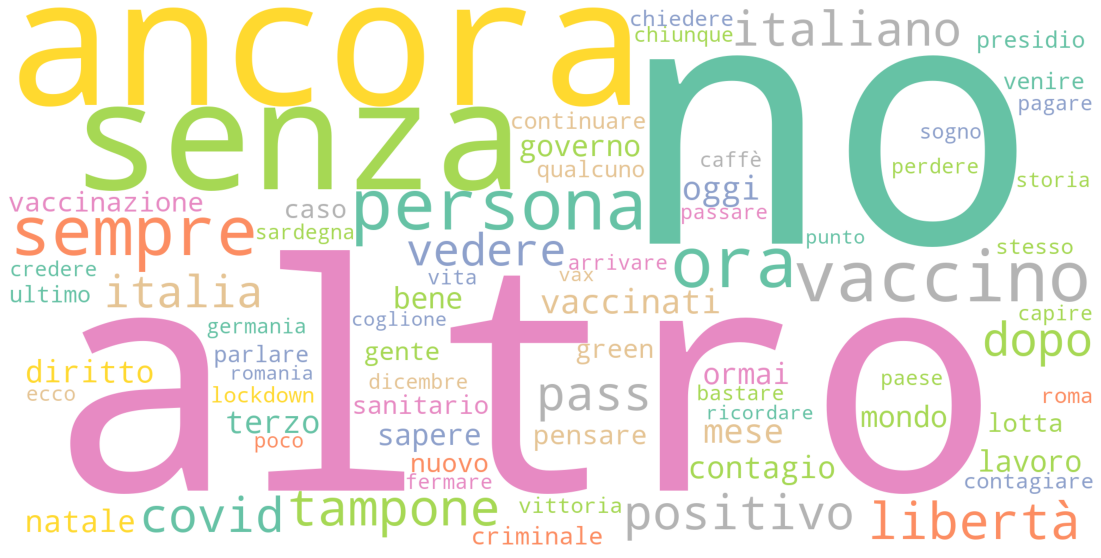

In [134]:
plot_cloud(wordcloud_novax)

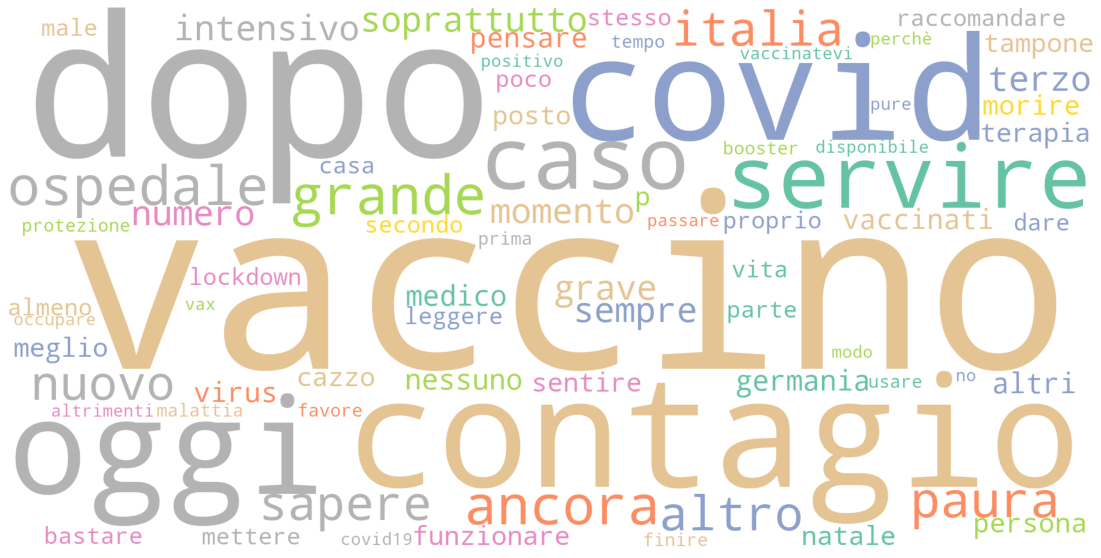

In [135]:
plot_cloud(wordcloud_provax)

In [ ]:
#grafico a torta per positivi novax vs negativi?